## DAY 41

首先回顾下昨天的代码。

In [8]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt
# import numpy as np

# # 设置中文字体支持
# plt.rcParams["font.family"] = ["SimHei"]
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# # 1. 数据预处理
# transform = transforms.Compose([
#     transforms.ToTensor(),                # 转换为张量
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 标准化处理
# ])

# # 2. 加载CIFAR-10数据集
# train_dataset = datasets.CIFAR10(
#     root='./data',
#     train=True,
#     download=True,
#     transform=transform
# )

# test_dataset = datasets.CIFAR10(
#     root='./data',
#     train=False,
#     transform=transform
# )

# # 3. 创建数据加载器
# batch_size = 64
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# # 4. 定义MLP模型（适应CIFAR-10的输入尺寸）
# class MLP(nn.Module):
#     def __init__(self):
#         super(MLP, self).__init__()
#         self.flatten = nn.Flatten()  # 将3x32x32的图像展平为3072维向量
#         self.layer1 = nn.Linear(3072, 512)  # 第一层：3072个输入，512个神经元
#         self.relu1 = nn.ReLU()
#         self.dropout1 = nn.Dropout(0.2)  # 添加Dropout防止过拟合
#         self.layer2 = nn.Linear(512, 256)  # 第二层：512个输入，256个神经元
#         self.relu2 = nn.ReLU()
#         self.dropout2 = nn.Dropout(0.2)
#         self.layer3 = nn.Linear(256, 10)  # 输出层：10个类别
        
#     def forward(self, x):
#         # 第一步：将输入图像展平为一维向量
#         x = self.flatten(x)  # 输入尺寸: [batch_size, 3, 32, 32] → [batch_size, 3072]
        
#         # 第一层全连接 + 激活 + Dropout
#         x = self.layer1(x)   # 线性变换: [batch_size, 3072] → [batch_size, 512]
#         x = self.relu1(x)    # 应用ReLU激活函数
#         x = self.dropout1(x) # 训练时随机丢弃部分神经元输出
        
#         # 第二层全连接 + 激活 + Dropout
#         x = self.layer2(x)   # 线性变换: [batch_size, 512] → [batch_size, 256]
#         x = self.relu2(x)    # 应用ReLU激活函数
#         x = self.dropout2(x) # 训练时随机丢弃部分神经元输出
        
#         # 第三层（输出层）全连接
#         x = self.layer3(x)   # 线性变换: [batch_size, 256] → [batch_size, 10]
        
#         return x  # 返回未经过Softmax的logits

# # 检查GPU是否可用
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # 初始化模型
# model = MLP()
# model = model.to(device)  # 将模型移至GPU（如果可用）

# criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器

# # 5. 训练模型（记录每个 iteration 的损失）
# def train(model, train_loader, test_loader, criterion, optimizer, device, epochs):
#     model.train()  # 设置为训练模式
    
#     # 记录每个 iteration 的损失
#     all_iter_losses = []  # 存储所有 batch 的损失
#     iter_indices = []     # 存储 iteration 序号
    
#     for epoch in range(epochs):
#         running_loss = 0.0
#         correct = 0
#         total = 0
        
#         for batch_idx, (data, target) in enumerate(train_loader):
#             data, target = data.to(device), target.to(device)  # 移至GPU
            
#             optimizer.zero_grad()  # 梯度清零
#             output = model(data)  # 前向传播
#             loss = criterion(output, target)  # 计算损失
#             loss.backward()  # 反向传播
#             optimizer.step()  # 更新参数
            
#             # 记录当前 iteration 的损失
#             iter_loss = loss.item()
#             all_iter_losses.append(iter_loss)
#             iter_indices.append(epoch * len(train_loader) + batch_idx + 1)
            
#             # 统计准确率和损失
#             running_loss += iter_loss
#             _, predicted = output.max(1)
#             total += target.size(0)
#             correct += predicted.eq(target).sum().item()
            
#             # 每100个批次打印一次训练信息
#             if (batch_idx + 1) % 100 == 0:
#                 print(f'Epoch: {epoch+1}/{epochs} | Batch: {batch_idx+1}/{len(train_loader)} '
#                       f'| 单Batch损失: {iter_loss:.4f} | 累计平均损失: {running_loss/(batch_idx+1):.4f}')
        
#         # 计算当前epoch的平均训练损失和准确率
#         epoch_train_loss = running_loss / len(train_loader)
#         epoch_train_acc = 100. * correct / total
        
#         # 测试阶段
#         model.eval()  # 设置为评估模式
#         test_loss = 0
#         correct_test = 0
#         total_test = 0
        
#         with torch.no_grad():
#             for data, target in test_loader:
#                 data, target = data.to(device), target.to(device)
#                 output = model(data)
#                 test_loss += criterion(output, target).item()
#                 _, predicted = output.max(1)
#                 total_test += target.size(0)
#                 correct_test += predicted.eq(target).sum().item()
        
#         epoch_test_loss = test_loss / len(test_loader)
#         epoch_test_acc = 100. * correct_test / total_test
        
#         print(f'Epoch {epoch+1}/{epochs} 完成 | 训练准确率: {epoch_train_acc:.2f}% | 测试准确率: {epoch_test_acc:.2f}%')
    
#     # 绘制所有 iteration 的损失曲线
#     plot_iter_losses(all_iter_losses, iter_indices)
    
#     return epoch_test_acc  # 返回最终测试准确率

# # 6. 绘制每个 iteration 的损失曲线
# def plot_iter_losses(losses, indices):
#     plt.figure(figsize=(10, 4))
#     plt.plot(indices, losses, 'b-', alpha=0.7, label='Iteration Loss')
#     plt.xlabel('Iteration（Batch序号）')
#     plt.ylabel('损失值')
#     plt.title('每个 Iteration 的训练损失')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # 7. 执行训练和测试
# epochs = 20  # 增加训练轮次以获得更好效果
# print("开始训练模型...")
# final_accuracy = train(model, train_loader, test_loader, criterion, optimizer, device, epochs)
# print(f"训练完成！最终测试准确率: {final_accuracy:.2f}%")

# # # 保存模型
# # torch.save(model.state_dict(), 'cifar10_mlp_model.pth')
# # # print("模型已保存为: cifar10_mlp_model.pth")

可以看到即使在深度神经网络情况下，准确率仍旧较差，这是因为特征没有被有效提取----真正重要的是特征的提取和加工过程。MLP把所有的像素全部展平了（这是全局的信息），无法布置到局部的信息，所以引入了卷积神经网络。（在之前的复试班已经交代清楚了，如果不清楚什么是卷积神经网络，请自行学习下相关概念）

复试班的计算机视觉部分的讲义
https://docs.qq.com/doc/DTFNucmRzc3RlRk5k

卷积层是特征提取器，池化层是特征压缩器。他们二者都是在做下采样操作。


### 一、数据增强

在图像数据预处理环节，为提升数据多样性，可采用数据增强（数据增广）策略。该策略通常不改变单次训练的样本总数，而是通过对现有图像进行多样化变换，使每次训练输入的样本呈现更丰富的形态差异，从而有效扩展模型训练的样本空间多样性。

常见的修改策略包括以下几类
1. 几何变换：如旋转、缩放、平移、剪裁、裁剪、翻转
2. 像素变换：如修改颜色、亮度、对比度、饱和度、色相、高斯模糊（模拟对焦失败）、增加噪声、马赛克
3. 语义增强（暂时不用）：mixup，对图像进行结构性改造、cutout随机遮挡等

此外，在数据极少的场景长，常常用生成模型来扩充数据集，如GAN、VAE等。

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体支持
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 1. 数据预处理
# 训练集：使用多种数据增强方法提高模型泛化能力
train_transform = transforms.Compose([
    # 随机裁剪图像，从原图中随机截取32x32大小的区域
    transforms.RandomCrop(32, padding=4),
    # 随机水平翻转图像（概率0.5）
    transforms.RandomHorizontalFlip(),
    # 随机颜色抖动：亮度、对比度、饱和度和色调随机变化
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    # 随机旋转图像（最大角度15度）
    transforms.RandomRotation(15),
    # 将PIL图像或numpy数组转换为张量
    transforms.ToTensor(),
    # 标准化处理：每个通道的均值和标准差，使数据分布更合理
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# 测试集：仅进行必要的标准化，保持数据原始特性，标准化不损失数据信息，可还原
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# 2. 加载CIFAR-10数据集
train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=train_transform  # 使用增强后的预处理
)

test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    transform=test_transform  # 测试集不使用增强
)

# 3. 创建数据加载器
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

使用设备: cuda
Files already downloaded and verified


注意数据增强一般是不改变每个批次的数据量，是对原始数据修改后替换原始数据。其中该数据集事先知道其均值和标准差，如果不知道，需要提前计算下。

### 二、 CNN模型

卷积的本质：通过卷积核在输入通道上的滑动乘积，提取跨通道的空间特征。所以只需要定义几个参数即可
1. 卷积核大小：卷积核的大小，如3x3、5x5、7x7等。
2. 输入通道数：输入图片的通道数，如1（单通道图片）、3（RGB图片）、4（RGBA图片）等。
3. 输出通道数：卷积核的个数，即输出的通道数。如本模型中通过 32→64→128 逐步增加特征复杂度
4. 步长（stride）：卷积核的滑动步长，默认为1。


In [ ]:
# 4. 定义CNN模型的定义（替代原MLP）
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()  # 继承父类初始化
        
        # ---------------------- 第一个卷积块 ----------------------
        # 卷积层1：输入3通道（RGB），输出32个特征图，卷积核3x3，边缘填充1像素
        self.conv1 = nn.Conv2d(
            in_channels=3,       # 输入通道数（图像的RGB通道）
            out_channels=32,     # 输出通道数（生成32个新特征图）
            kernel_size=3,       # 卷积核尺寸（3x3像素）
            padding=1            # 边缘填充1像素，保持输出尺寸与输入相同
        )
        # 批量归一化层：对32个输出通道进行归一化，加速训练
        self.bn1 = nn.BatchNorm2d(num_features=32)
        # ReLU激活函数：引入非线性，公式：max(0, x)
        self.relu1 = nn.ReLU()
        # 最大池化层：窗口2x2，步长2，特征图尺寸减半（32x32→16x16）
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # stride默认等于kernel_size
        
        # ---------------------- 第二个卷积块 ----------------------
        # 卷积层2：输入32通道（来自conv1的输出），输出64通道
        self.conv2 = nn.Conv2d(
            in_channels=32,      # 输入通道数（前一层的输出通道数）
            out_channels=64,     # 输出通道数（特征图数量翻倍）
            kernel_size=3,       # 卷积核尺寸不变
            padding=1            # 保持尺寸：16x16→16x16（卷积后）→8x8（池化后）
        )
        self.bn2 = nn.BatchNorm2d(num_features=64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)  # 尺寸减半：16x16→8x8
        
        # ---------------------- 第三个卷积块 ----------------------
        # 卷积层3：输入64通道，输出128通道
        self.conv3 = nn.Conv2d(
            in_channels=64,      # 输入通道数（前一层的输出通道数）
            out_channels=128,    # 输出通道数（特征图数量再次翻倍）
            kernel_size=3,
            padding=1            # 保持尺寸：8x8→8x8（卷积后）→4x4（池化后）
        )
        self.bn3 = nn.BatchNorm2d(num_features=128)
        self.relu3 = nn.ReLU()  # 复用激活函数对象（节省内存）
        self.pool3 = nn.MaxPool2d(kernel_size=2)  # 尺寸减半：8x8→4x4
        
        # ---------------------- 全连接层（分类器） ----------------------
        # 计算展平后的特征维度：128通道 × 4x4尺寸 = 128×16=2048维
        self.fc1 = nn.Linear(
            in_features=128 * 4 * 4,  # 输入维度（卷积层输出的特征数）
            out_features=512          # 输出维度（隐藏层神经元数）
        )
        # Dropout层：训练时随机丢弃50%神经元，防止过拟合
        self.dropout = nn.Dropout(p=0.5)
        # 输出层：将512维特征映射到10个类别（CIFAR-10的类别数）
        self.fc2 = nn.Linear(in_features=512, out_features=10)

    def forward(self, x):
        # 输入尺寸：[batch_size, 3, 32, 32]（batch_size=批量大小，3=通道数，32x32=图像尺寸）
        
        # ---------- 卷积块1处理 ----------
        x = self.conv1(x)       # 卷积后尺寸：[batch_size, 32, 32, 32]（padding=1保持尺寸）
        x = self.bn1(x)         # 批量归一化，不改变尺寸
        x = self.relu1(x)       # 激活函数，不改变尺寸
        x = self.pool1(x)       # 池化后尺寸：[batch_size, 32, 16, 16]（32→16是因为池化窗口2x2）
        
        # ---------- 卷积块2处理 ----------
        x = self.conv2(x)       # 卷积后尺寸：[batch_size, 64, 16, 16]（padding=1保持尺寸）
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)       # 池化后尺寸：[batch_size, 64, 8, 8]
        
        # ---------- 卷积块3处理 ----------
        x = self.conv3(x)       # 卷积后尺寸：[batch_size, 128, 8, 8]（padding=1保持尺寸）
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)       # 池化后尺寸：[batch_size, 128, 4, 4]
        
        # ---------- 展平与全连接层 ----------
        # 将多维特征图展平为一维向量：[batch_size, 128*4*4] = [batch_size, 2048]
        x = x.view(-1, 128 * 4 * 4)  # -1自动计算批量维度，保持批量大小不变
        
        x = self.fc1(x)           # 全连接层：2048→512，尺寸变为[batch_size, 512]
        x = self.relu3(x)         # 激活函数（复用relu3，与卷积块3共用）
        x = self.dropout(x)       # Dropout随机丢弃神经元，不改变尺寸
        x = self.fc2(x)           # 全连接层：512→10，尺寸变为[batch_size, 10]（未激活，直接输出logits）
        
        return x  # 输出未经过Softmax的logits，适用于交叉熵损失函数



# 初始化模型
model = CNN()
model = model.to(device)  # 将模型移至GPU（如果可用）



上述定义CNN模型中：
1. 使用三层卷积+池化结构提取图像特征
2. 每层卷积后添加BatchNorm加速训练并提高稳定性
3. 使用Dropout减少过拟合

可以把全连接层前面的不理解为神经网络的一部分，单纯理解为特征提取器，他们的存在就是帮助模型进行特征提取的。




#### 2.1 batch归一化

Batch 归一化是深度学习中常用的一种归一化技术，加速模型收敛并提升泛化能力。通常位于卷积层后。

卷积操作常见流程如下：
1. 输入 → 卷积层 → Batch归一化层（可选） → 池化层 → 激活函数 → 下一层
2. Flatten -> Dense (with Dropout，可选) -> Dense (Output)

其中，BatchNorm 应在池化前对空间维度的特征完成归一化，以确保归一化统计量基于足够多的样本（空间位置），避免池化导致的统计量偏差

旨在解决深度神经网络训练中的内部协变量偏移问题：深层网络中，随着前层参数更新，后层输入分布会发生变化，导致模型需要不断适应新分布，训练难度增加。就好比你在学新知识，知识体系的基础一直在变，你就得不断重新适应，模型训练也是如此，这就导致训练变得困难，这就是内部协变量偏移问题。

通过对每个批次的输入数据进行标准化（均值为 0、方差为 1），想象把一堆杂乱无章、分布不同的数据规整到一个标准的样子。
1. 使各层输入分布稳定，让数据处于激活函数比较合适的区域，缓解梯度消失 / 爆炸问题;
2. 因为数据分布稳定了，所以允许使用更大的学习率，提升训练效率。

 
| **阶段**       | **均值/方差来源**          | **参数更新**               |  
|----------------|---------------------------|---------------------------|  
| **训练阶段**   | 基于当前批次数据计算       | 实时更新 $gamma$、$beta$ |  
| **推理阶段**   | 使用训练集的**全局统计量**（如滑动平均后的均值和方差） | 不更新参数，直接使用固定值 | 


深度学习的归一化有2类：
1. Batch Normalization：一般用于图像数据，因为图像数据通常是批量处理，有相对固定的 Batch Size ，能利用 Batch 内数据计算稳定的统计量（均值、方差 ）来做归一化。
2. Layer Normalization：一般用于文本数据，本数据的序列长度往往不同，像不同句子长短不一，很难像图像那样固定 Batch Size 。如果用 Batch 归一化，不同批次的统计量波动大，效果不好。层归一化是对单个样本的所有隐藏单元进行归一化，不依赖批次。

ps：这个操作在结构化数据中其实是叫做标准化，但是在深度学习领域，习惯把这类对网络中间层数据进行调整分布的操作都叫做归一化 。

#### 2.2 特征图

卷积层输出的叫做特征图，通过输入尺寸和卷积核的尺寸、步长可以计算出输出尺寸。可以通过可视化中间层的特征图，理解 CNN 如何从底层特征（如边缘）逐步提取高层语义特征（如物体部件、整体结构）。MLP是不输出特征图的，因为他输出的一维向量，无法保留空间维度

特征图就代表着在之前特征提取器上提取到的特征，可以通过 Grad-CAM方法来查看模型在识别图像时，特征图所对应的权重是多少。-----深度学习可解释性

我们在后续介绍。下面接着训练CNN模型

#### 2.3 调度器

In [11]:
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器

# 引入学习率调度器，在训练过程中动态调整学习率--训练初期使用较大的 LR 快速降低损失，训练后期使用较小的 LR 更精细地逼近全局最优解。
# 在每个 epoch 结束后，需要手动调用调度器来更新学习率，可以在训练过程中调用 scheduler.step()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,        # 指定要控制的优化器（这里是Adam）
    mode='min',       # 监测的指标是"最小化"（如损失函数）
    patience=3,       # 如果连续3个epoch指标没有改善，才降低LR
    factor=0.5        # 降低LR的比例（新LR = 旧LR × 0.5）
)

ReduceLROnPlateau调度器适用于当监测的指标（如验证损失）停滞时降低学习率。是大多数任务的首选调度器，尤其适合验证集波动较大的情况

这种学习率调度器的方法相较于之前只有单纯的优化器，是一种超参数的优化方法，它通过调整学习率来优化模型。

常见的优化器有 adam、SGD、RMSprop 等，而除此之外学习率调度器有 lr_scheduler.StepLR、lr_scheduler.ExponentialLR、lr_scheduler.CosineAnnealingLR 等。
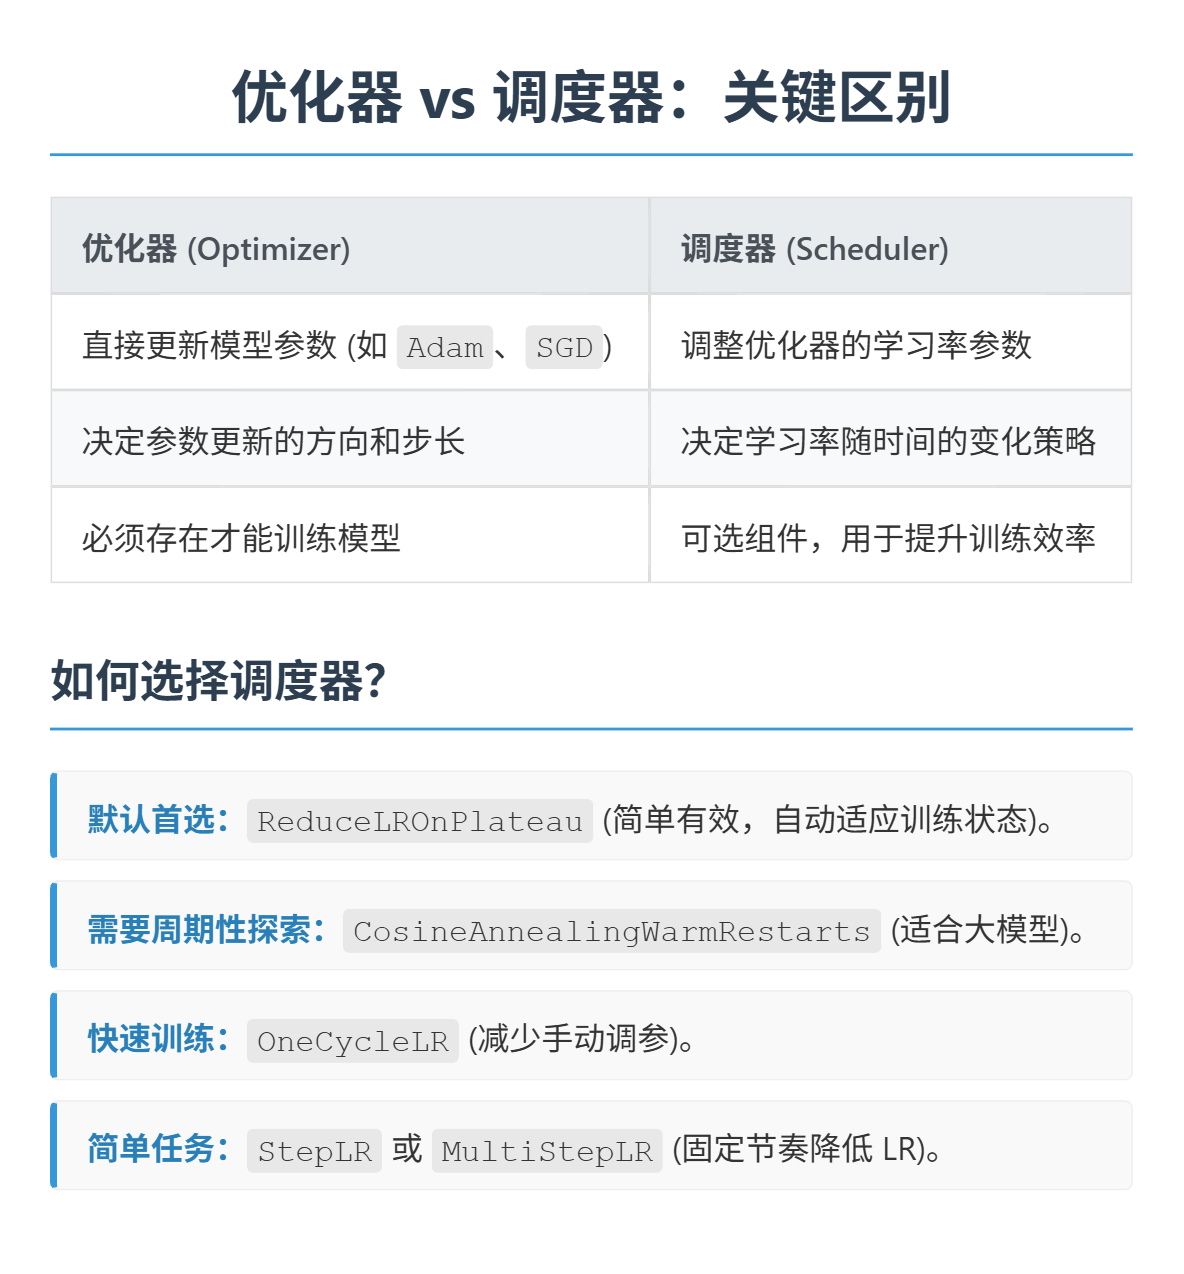



In [12]:
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  
# # 每5个epoch，LR = LR × 0.1  

# scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20, 30], gamma=0.5)  
# # 当epoch=10、20、30时，LR = LR × 0.5  

# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0.0001)  
# # LR在[0.0001, LR_initial]之间按余弦曲线变化，周期为2×T_max  

可以把优化器和调度器理解为调参手段，学习率是参数

注意，优化器如adam虽然也在调整学习率，但是他的调整是相对值，计算步长后根据基础学习率来调整。但是调度器是直接调整基础学习率。

开始使用CNN训练模型...
Epoch: 1/20 | Batch: 100/782 | 单Batch损失: 1.6939 | 累计平均损失: 2.0402
Epoch: 1/20 | Batch: 200/782 | 单Batch损失: 1.7632 | 累计平均损失: 1.9162
Epoch: 1/20 | Batch: 300/782 | 单Batch损失: 1.6051 | 累计平均损失: 1.8418
Epoch: 1/20 | Batch: 400/782 | 单Batch损失: 1.6624 | 累计平均损失: 1.7934
Epoch: 1/20 | Batch: 500/782 | 单Batch损失: 1.7259 | 累计平均损失: 1.7492
Epoch: 1/20 | Batch: 600/782 | 单Batch损失: 1.3839 | 累计平均损失: 1.7149
Epoch: 1/20 | Batch: 700/782 | 单Batch损失: 1.7046 | 累计平均损失: 1.6879
Epoch 1/20 完成 | 训练准确率: 38.46% | 测试准确率: 54.70%
Epoch: 2/20 | Batch: 100/782 | 单Batch损失: 1.5352 | 累计平均损失: 1.4148
Epoch: 2/20 | Batch: 200/782 | 单Batch损失: 1.3239 | 累计平均损失: 1.3802
Epoch: 2/20 | Batch: 300/782 | 单Batch损失: 1.4556 | 累计平均损失: 1.3511
Epoch: 2/20 | Batch: 400/782 | 单Batch损失: 1.2608 | 累计平均损失: 1.3269
Epoch: 2/20 | Batch: 500/782 | 单Batch损失: 0.9699 | 累计平均损失: 1.3041
Epoch: 2/20 | Batch: 600/782 | 单Batch损失: 1.1444 | 累计平均损失: 1.2882
Epoch: 2/20 | Batch: 700/782 | 单Batch损失: 1.0800 | 累计平均损失: 1.2723
Epoch 2/20 完成 | 训练准确率: 54.43%

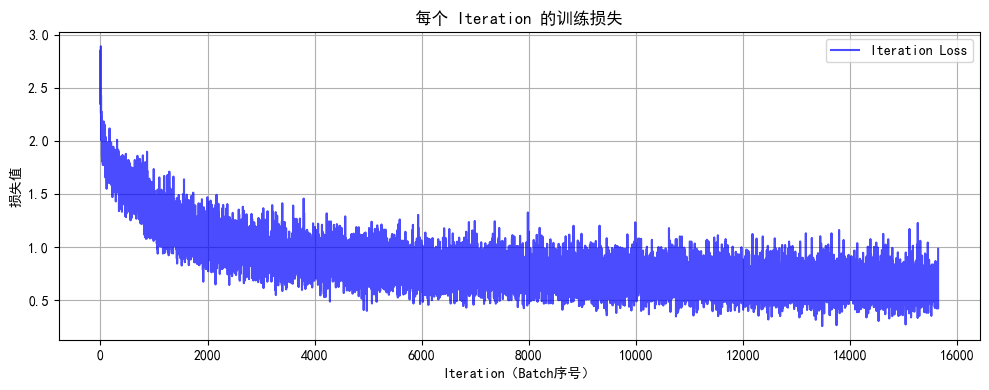

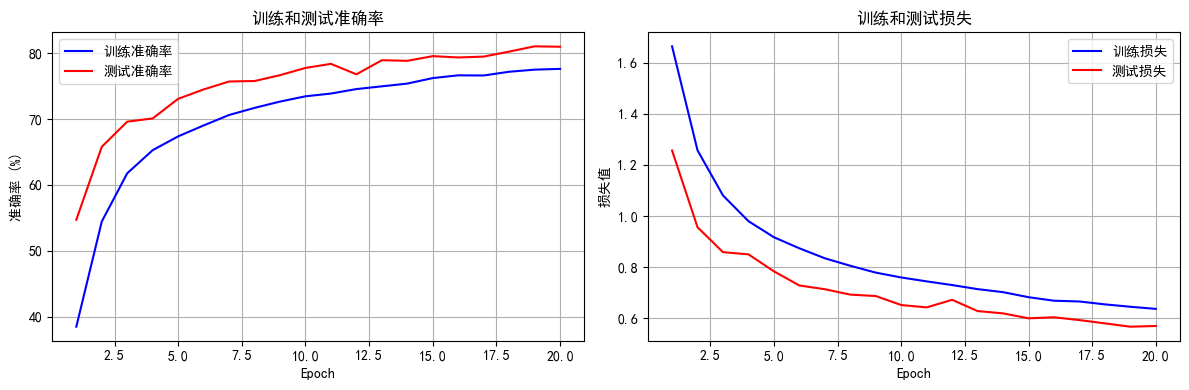

训练完成！最终测试准确率: 80.98%


In [13]:
# 5. 训练模型（记录每个 iteration 的损失）
def train(model, train_loader, test_loader, criterion, optimizer, scheduler, device, epochs):
    model.train()  # 设置为训练模式
    
    # 记录每个 iteration 的损失
    all_iter_losses = []  # 存储所有 batch 的损失
    iter_indices = []     # 存储 iteration 序号
    
    # 记录每个 epoch 的准确率和损失
    train_acc_history = []
    test_acc_history = []
    train_loss_history = []
    test_loss_history = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)  # 移至GPU
            
            optimizer.zero_grad()  # 梯度清零
            output = model(data)  # 前向传播
            loss = criterion(output, target)  # 计算损失
            loss.backward()  # 反向传播
            optimizer.step()  # 更新参数
            
            # 记录当前 iteration 的损失
            iter_loss = loss.item()
            all_iter_losses.append(iter_loss)
            iter_indices.append(epoch * len(train_loader) + batch_idx + 1)
            
            # 统计准确率和损失
            running_loss += iter_loss
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
            
            # 每100个批次打印一次训练信息
            if (batch_idx + 1) % 100 == 0:
                print(f'Epoch: {epoch+1}/{epochs} | Batch: {batch_idx+1}/{len(train_loader)} '
                      f'| 单Batch损失: {iter_loss:.4f} | 累计平均损失: {running_loss/(batch_idx+1):.4f}')
        
        # 计算当前epoch的平均训练损失和准确率
        epoch_train_loss = running_loss / len(train_loader)
        epoch_train_acc = 100. * correct / total
        train_acc_history.append(epoch_train_acc)
        train_loss_history.append(epoch_train_loss)
        
        # 测试阶段
        model.eval()  # 设置为评估模式
        test_loss = 0
        correct_test = 0
        total_test = 0
        
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += criterion(output, target).item()
                _, predicted = output.max(1)
                total_test += target.size(0)
                correct_test += predicted.eq(target).sum().item()
        
        epoch_test_loss = test_loss / len(test_loader)
        epoch_test_acc = 100. * correct_test / total_test
        test_acc_history.append(epoch_test_acc)
        test_loss_history.append(epoch_test_loss)
        
        # 更新学习率调度器
        scheduler.step(epoch_test_loss)
        
        print(f'Epoch {epoch+1}/{epochs} 完成 | 训练准确率: {epoch_train_acc:.2f}% | 测试准确率: {epoch_test_acc:.2f}%')
    
    # 绘制所有 iteration 的损失曲线
    plot_iter_losses(all_iter_losses, iter_indices)
    
    # 绘制每个 epoch 的准确率和损失曲线
    plot_epoch_metrics(train_acc_history, test_acc_history, train_loss_history, test_loss_history)
    
    return epoch_test_acc  # 返回最终测试准确率

# 6. 绘制每个 iteration 的损失曲线
def plot_iter_losses(losses, indices):
    plt.figure(figsize=(10, 4))
    plt.plot(indices, losses, 'b-', alpha=0.7, label='Iteration Loss')
    plt.xlabel('Iteration（Batch序号）')
    plt.ylabel('损失值')
    plt.title('每个 Iteration 的训练损失')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 7. 绘制每个 epoch 的准确率和损失曲线
def plot_epoch_metrics(train_acc, test_acc, train_loss, test_loss):
    epochs = range(1, len(train_acc) + 1)
    
    plt.figure(figsize=(12, 4))
    
    # 绘制准确率曲线
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'b-', label='训练准确率')
    plt.plot(epochs, test_acc, 'r-', label='测试准确率')
    plt.xlabel('Epoch')
    plt.ylabel('准确率 (%)')
    plt.title('训练和测试准确率')
    plt.legend()
    plt.grid(True)
    
    # 绘制损失曲线
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'b-', label='训练损失')
    plt.plot(epochs, test_loss, 'r-', label='测试损失')
    plt.xlabel('Epoch')
    plt.ylabel('损失值')
    plt.title('训练和测试损失')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# 8. 执行训练和测试
epochs = 20  # 增加训练轮次以获得更好效果
print("开始使用CNN训练模型...")
final_accuracy = train(model, train_loader, test_loader, criterion, optimizer, scheduler, device, epochs)
print(f"训练完成！最终测试准确率: {final_accuracy:.2f}%")

# # 保存模型
# torch.save(model.state_dict(), 'cifar10_cnn_model.pth')
# print("模型已保存为: cifar10_cnn_model.pth")

以CIFAR-10为例，假设两者均使用2层隐藏层：
| 模型结构         | 参数规模       | 特征提取方式       | 计算效率       | 典型准确率   |
|------------------|----------------|--------------------|----------------|--------------|
| **MLP**          | 3072→1024→512→10<br>≈370万参数 | 全连接，无空间感知 | 每次计算需遍历所有参数 | 50-55%       |
| **CNN**（简单）  | 3×3卷积→池化→全连接<br>≈10万参数 | 局部感知+权值共享 | 卷积核复用计算，效率高 | 70-80%       |


